In [916]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [917]:
df = pd.read_excel("data.xlsx", sheet_name="Raw_data")
df = df[['Year', 'Married', 'Income', "Mean age", "Household", "Total", 'Income per member',]]

In [918]:
df_all = df
df = df[:25]
df

,Year,Married,Income,Mean age,Household,Total,Income per member
0,1993,114601,78140,25.50,96391,197254,15500
1,1994,115253,79610,25.60,97107,200800,16300
2,1995,116554,81030,25.70,98990,202732,16940
3,1996,116561,82780,25.95,99627,204624,17850
4,1997,116752,85460,25.90,101018,207235,18940
5,1998,117966,87980,25.85,102528,209291,19840
6,1999,119040,90990,26.00,103874,211676,21060
7,2000,120211,91810,25.95,104705,213774,22130
8,2001,123098,91470,26.00,108209,219035,22570
9,2002,123370,89790,26.10,109297,221458,22530


In [919]:
df.describe()

,Year,Married,Income,Mean age,Household,Total,Income per member
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2005.000000,125517.720000,89721.600000,26.690000,112143.720000,229046.720000,24412.000000
std,7.359801,6685.028917,5602.720083,0.941962,9520.963469,19449.196392,5173.445821
min,1993.000000,114601.000000,78140.000000,25.500000,96391.000000,197254.000000,15500.000000
25%,1999.000000,119040.000000,87980.000000,25.950000,103874.000000,211676.000000,21060.000000
50%,2005.000000,127142.000000,89920.000000,26.350000,113343.000000,230272.000000,24670.000000
75%,2011.000000,130767.000000,91810.000000,27.400000,119927.000000,245275.000000,27330.000000
max,2017.000000,135749.000000,103300.000000,28.450000,126224.000000,259063.000000,34640.000000


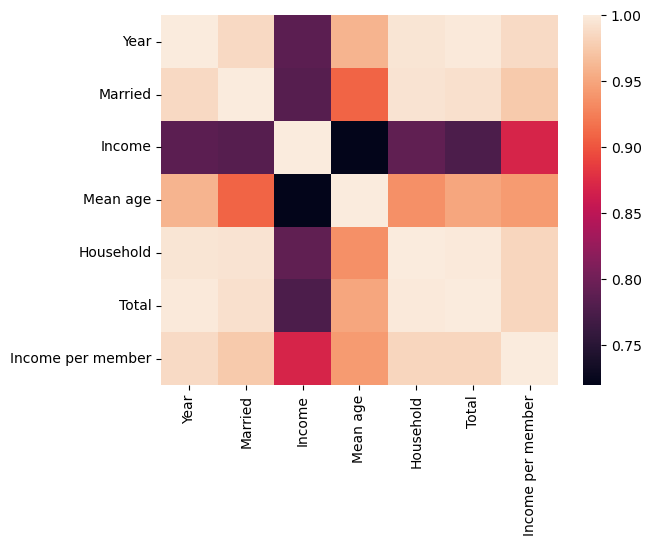

In [920]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [921]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

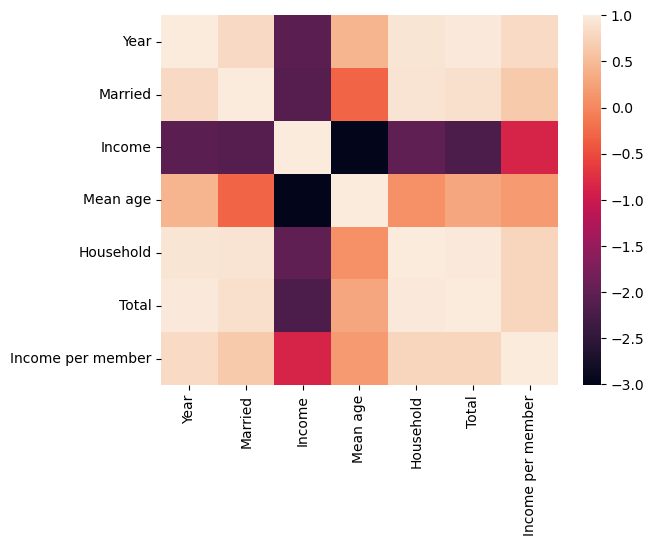

In [922]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [923]:
new

,Year,Married,Income,Mean age,Household,Total,Income per member
Year,1.000000,0.985780,0.785702,0.959830,0.995586,0.998708,0.987215
Married,0.985780,1.000000,0.782517,0.908546,0.994404,0.991485,0.975002
Income,0.785702,0.782517,1.000000,0.719628,0.789043,0.775840,0.868952
Mean age,0.959830,0.908546,0.719628,1.000000,0.935904,0.950156,0.942462
Household,0.995586,0.994404,0.789043,0.935904,1.000000,0.998158,0.984074
Total,0.998708,0.991485,0.775840,0.950156,0.998158,1.000000,0.983914
Income per member,0.987215,0.975002,0.868952,0.942462,0.984074,0.983914,1.000000


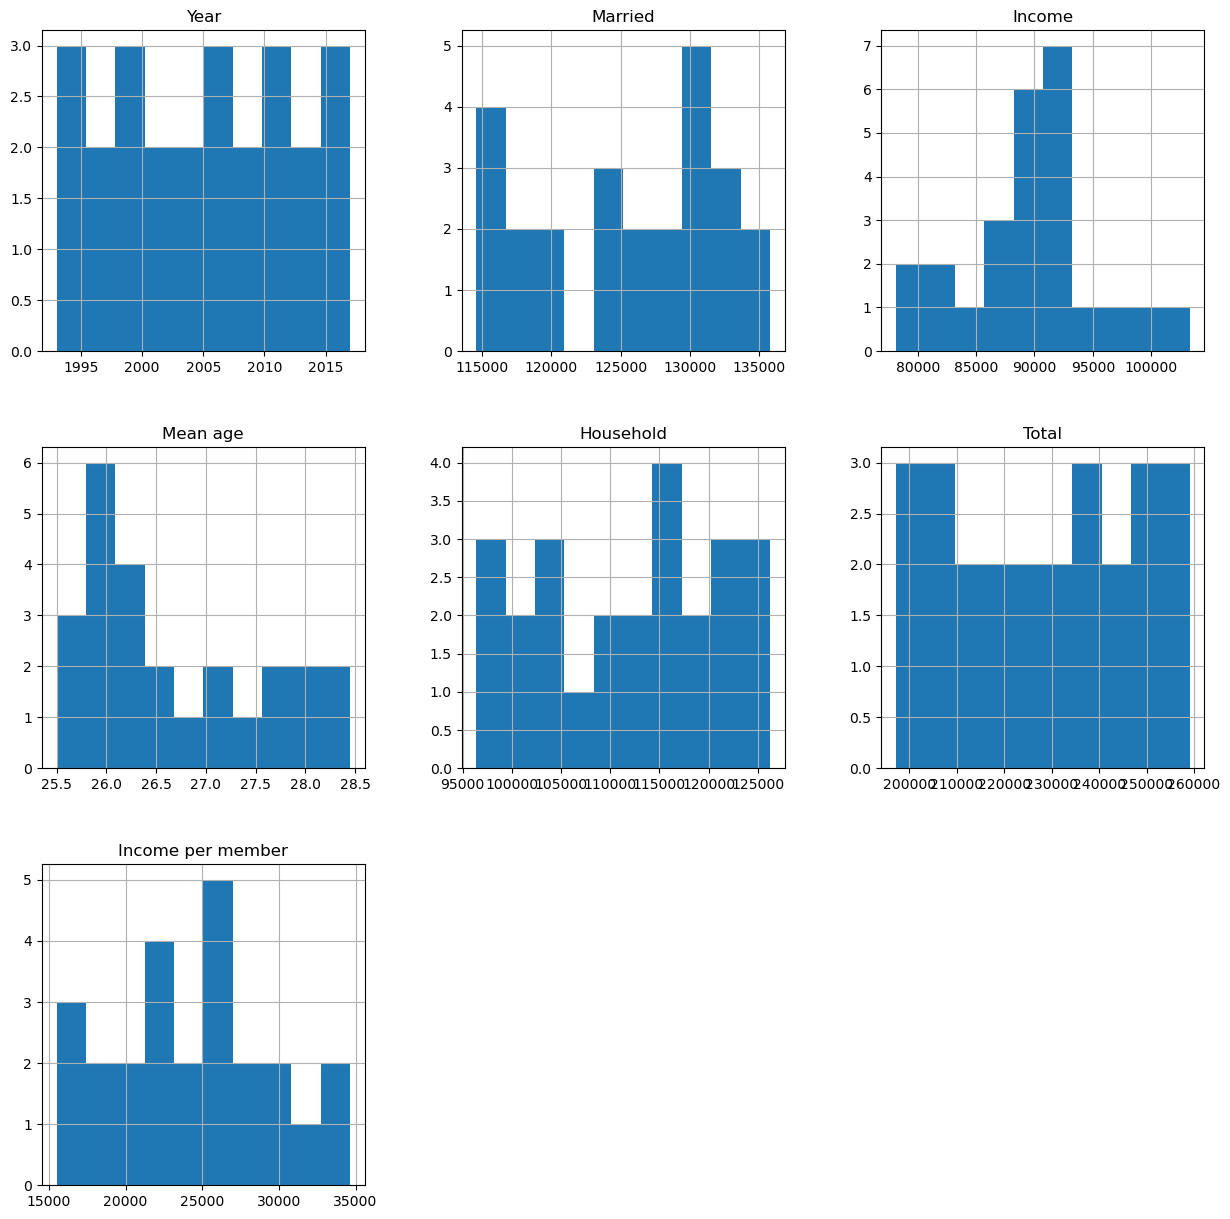

In [924]:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [925]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parameter testing

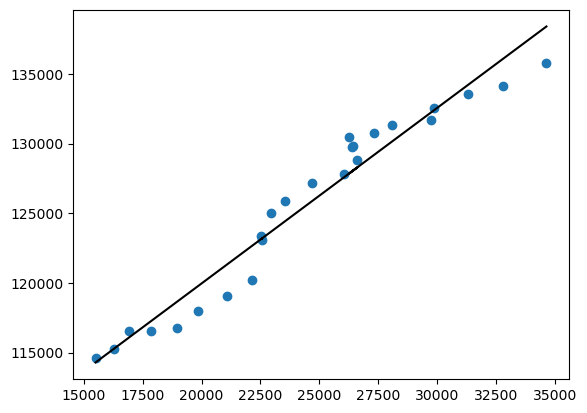

In [926]:
alpha = 1.26
beta = 94800

A = np.vstack([df['Income per member'], np.ones(len(df['Income per member']))]).T
a, b = np.linalg.lstsq(A, df['Married'], rcond=None)[0]

plt.scatter(df['Income per member'], df['Married'])
plt.plot(df['Income per member'], a*df['Income per member'] + b, color='black')


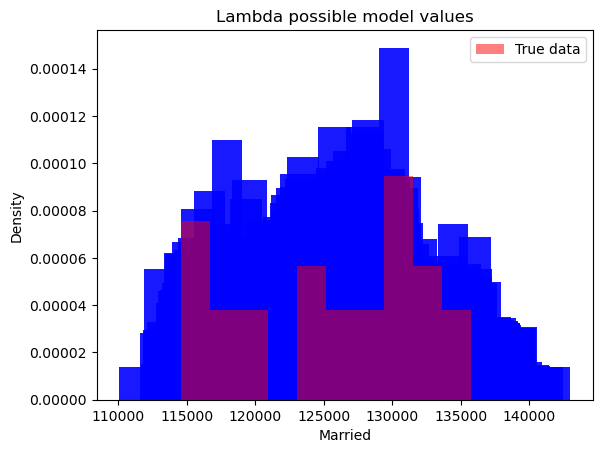

In [927]:
from numpy import random

sim = random.normal(alpha*df['Income per member'] + beta, 1500, (100,25))

for i in range(len(sim)):
    plt.hist(sim[i], color='blue', alpha = 0.9, density=True)

# sim = random.poisson(-alpha*df['Income per member'] + beta, (100,25))

# for i in range(len(sim)):
#     plt.hist(sim[i], color='green', alpha = 0.9, density=True)

plt.hist(df['Married'], color='red', bins=10, alpha = 0.5, density=True, label='True data')
plt.title('Lambda possible model values')
plt.xlabel('Married')
plt.ylabel('Density')
plt.legend()
plt.show()

# Income na małżeństwa

In [928]:
model = CmdStanModel(stan_file='test_prior.stan')
N = 25
R = 30

In [929]:
data = {'N': N, 'income': df['Income per member']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

15:12:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


15:12:31 - cmdstanpy - INFO - CmdStan done processing.


In [930]:
gen_1.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23],y_sim[24],y_sim[25]
0,0.0,0.0,1.36833,96354.4,363.8660,117610.0,118153.0,119623.0,121215.0,123095.0,...,132869.0,132274.0,132493.0,133983.0,135088.0,136976.0,137248.0,138562.0,141258.0,143517.0
1,0.0,0.0,1.30723,94514.1,920.0090,115364.0,116217.0,114048.0,118800.0,119756.0,...,129539.0,127583.0,128503.0,129990.0,131911.0,133667.0,134140.0,134327.0,137372.0,139793.0
2,0.0,0.0,1.30859,96319.1,1369.8500,118216.0,119311.0,119569.0,120729.0,118866.0,...,129315.0,131678.0,133251.0,131625.0,130420.0,135758.0,135552.0,135992.0,140686.0,141617.0
3,0.0,0.0,1.27481,93623.4,1448.9200,114056.0,113217.0,114995.0,113639.0,116321.0,...,126038.0,126968.0,129143.0,128354.0,128789.0,129899.0,129919.0,135577.0,135152.0,137551.0
4,0.0,0.0,1.28421,95587.9,1441.3400,112428.0,116838.0,114093.0,117634.0,118647.0,...,128524.0,129962.0,130414.0,131389.0,129824.0,135225.0,134861.0,134208.0,139137.0,140184.0
5,0.0,0.0,1.25440,95516.4,1588.6000,115357.0,114750.0,118564.0,116937.0,119177.0,...,129235.0,126909.0,128203.0,128992.0,132839.0,131787.0,132627.0,133264.0,136298.0,140491.0
6,0.0,0.0,1.28807,96690.2,1200.1300,115455.0,115550.0,118715.0,118619.0,119441.0,...,132007.0,130187.0,131116.0,131732.0,132871.0,135483.0,137043.0,139486.0,141733.0,141598.0
7,0.0,0.0,1.25677,95355.2,615.7430,115384.0,116017.0,117177.0,118132.0,119254.0,...,128365.0,126763.0,128145.0,129220.0,130156.0,133541.0,133390.0,135025.0,137417.0,139193.0
8,0.0,0.0,1.29109,98321.7,1547.9300,118073.0,118255.0,121154.0,122357.0,123511.0,...,130221.0,131720.0,133099.0,131137.0,134658.0,134445.0,135174.0,138853.0,141658.0,141923.0
9,0.0,0.0,1.23215,92709.9,1588.1100,114305.0,114876.0,112422.0,114987.0,115828.0,...,123322.0,122590.0,124012.0,125391.0,128307.0,132825.0,129838.0,130084.0,134948.0,135123.0


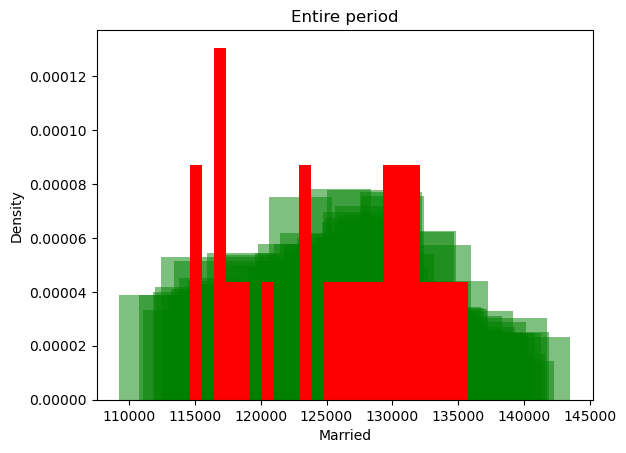

In [931]:
for i in range(R):
    plt.hist(gen_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)
plt.hist(df['Married'], bins=23, color='red', density=True)
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.show()

In [932]:
post_model = CmdStanModel(stan_file='test_posterior.stan')


In [933]:
data_post = {'N': N, 'y': df['Married'], 'income': df['Income per member']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

15:12:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


15:12:33 - cmdstanpy - INFO - CmdStan done processing.


In [934]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22],log_lik[23],log_lik[24],log_lik[25]
0,-6056.36,1.000000,0.27088,4.0,15.0,0.0,6057.42,0.875331,103826.0,7461.97,...,-9.86360,-9.95455,-9.90718,-9.91834,-9.91381,-9.86526,-9.89825,-9.88571,-9.86000,-9.85956
1,-6053.39,0.950874,0.27088,3.0,11.0,0.0,6058.25,0.855631,104428.0,6888.45,...,-9.78554,-9.88866,-9.83466,-9.84855,-9.84423,-9.78968,-9.82822,-9.81498,-9.78562,-9.78636
2,-6054.40,0.609605,0.27088,2.0,3.0,0.0,6055.33,0.859343,104789.0,6938.74,...,-9.77873,-9.86244,-9.81700,-9.82829,-9.82457,-9.78140,-9.81118,-9.80041,-9.77822,-9.77857
3,-6054.30,0.945775,0.27088,3.0,15.0,0.0,6056.18,0.870324,104549.0,6959.46,...,-9.78036,-9.86177,-9.81737,-9.82783,-9.82383,-9.78202,-9.81008,-9.79926,-9.77834,-9.77821
4,-6053.53,1.000000,0.27088,2.0,7.0,0.0,6054.58,0.867459,104423.0,6917.34,...,-9.77973,-9.87006,-9.82168,-9.83334,-9.82906,-9.78197,-9.81407,-9.80208,-9.77779,-9.77777
5,-6053.65,0.936978,0.27088,3.0,15.0,0.0,6055.10,0.907331,103488.0,6985.90,...,-9.78591,-9.87047,-9.82472,-9.83368,-9.82829,-9.78473,-9.81174,-9.79938,-9.77899,-9.77766
6,-6053.69,0.999751,0.27088,4.0,15.0,0.0,6053.89,0.902847,102955.0,7030.86,...,-9.81259,-9.92104,-9.86504,-9.87658,-9.87002,-9.81131,-9.84919,-9.83288,-9.80245,-9.80037
7,-6053.83,0.962992,0.27088,4.0,15.0,0.0,6056.53,0.906356,102881.0,7201.48,...,-9.83420,-9.93695,-9.88384,-9.89457,-9.88821,-9.83261,-9.86820,-9.85262,-9.82399,-9.82188
8,-6052.95,0.991729,0.27088,3.0,11.0,0.0,6054.22,0.878254,103805.0,6951.08,...,-9.79478,-9.89742,-9.84377,-9.85621,-9.85097,-9.79631,-9.83316,-9.81890,-9.79020,-9.78954
9,-6053.10,0.999812,0.27088,4.0,15.0,0.0,6053.23,0.900533,103401.0,7197.82,...,-9.82191,-9.91122,-9.86394,-9.87367,-9.86828,-9.82115,-9.85124,-9.83815,-9.81472,-9.81330


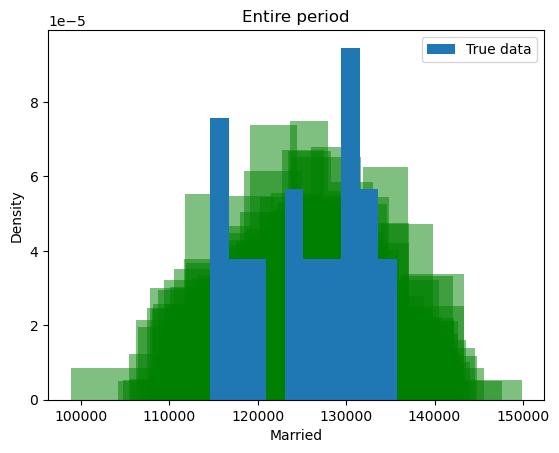

In [935]:

for i in range(R):
    plt.hist(fit_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)

plt.hist(df['Married'], density=True, label= 'True data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

# Analiza

In [936]:
# az.summary(fit_1)

In [937]:
# az.plot_posterior(fit_1)
# plt.show()

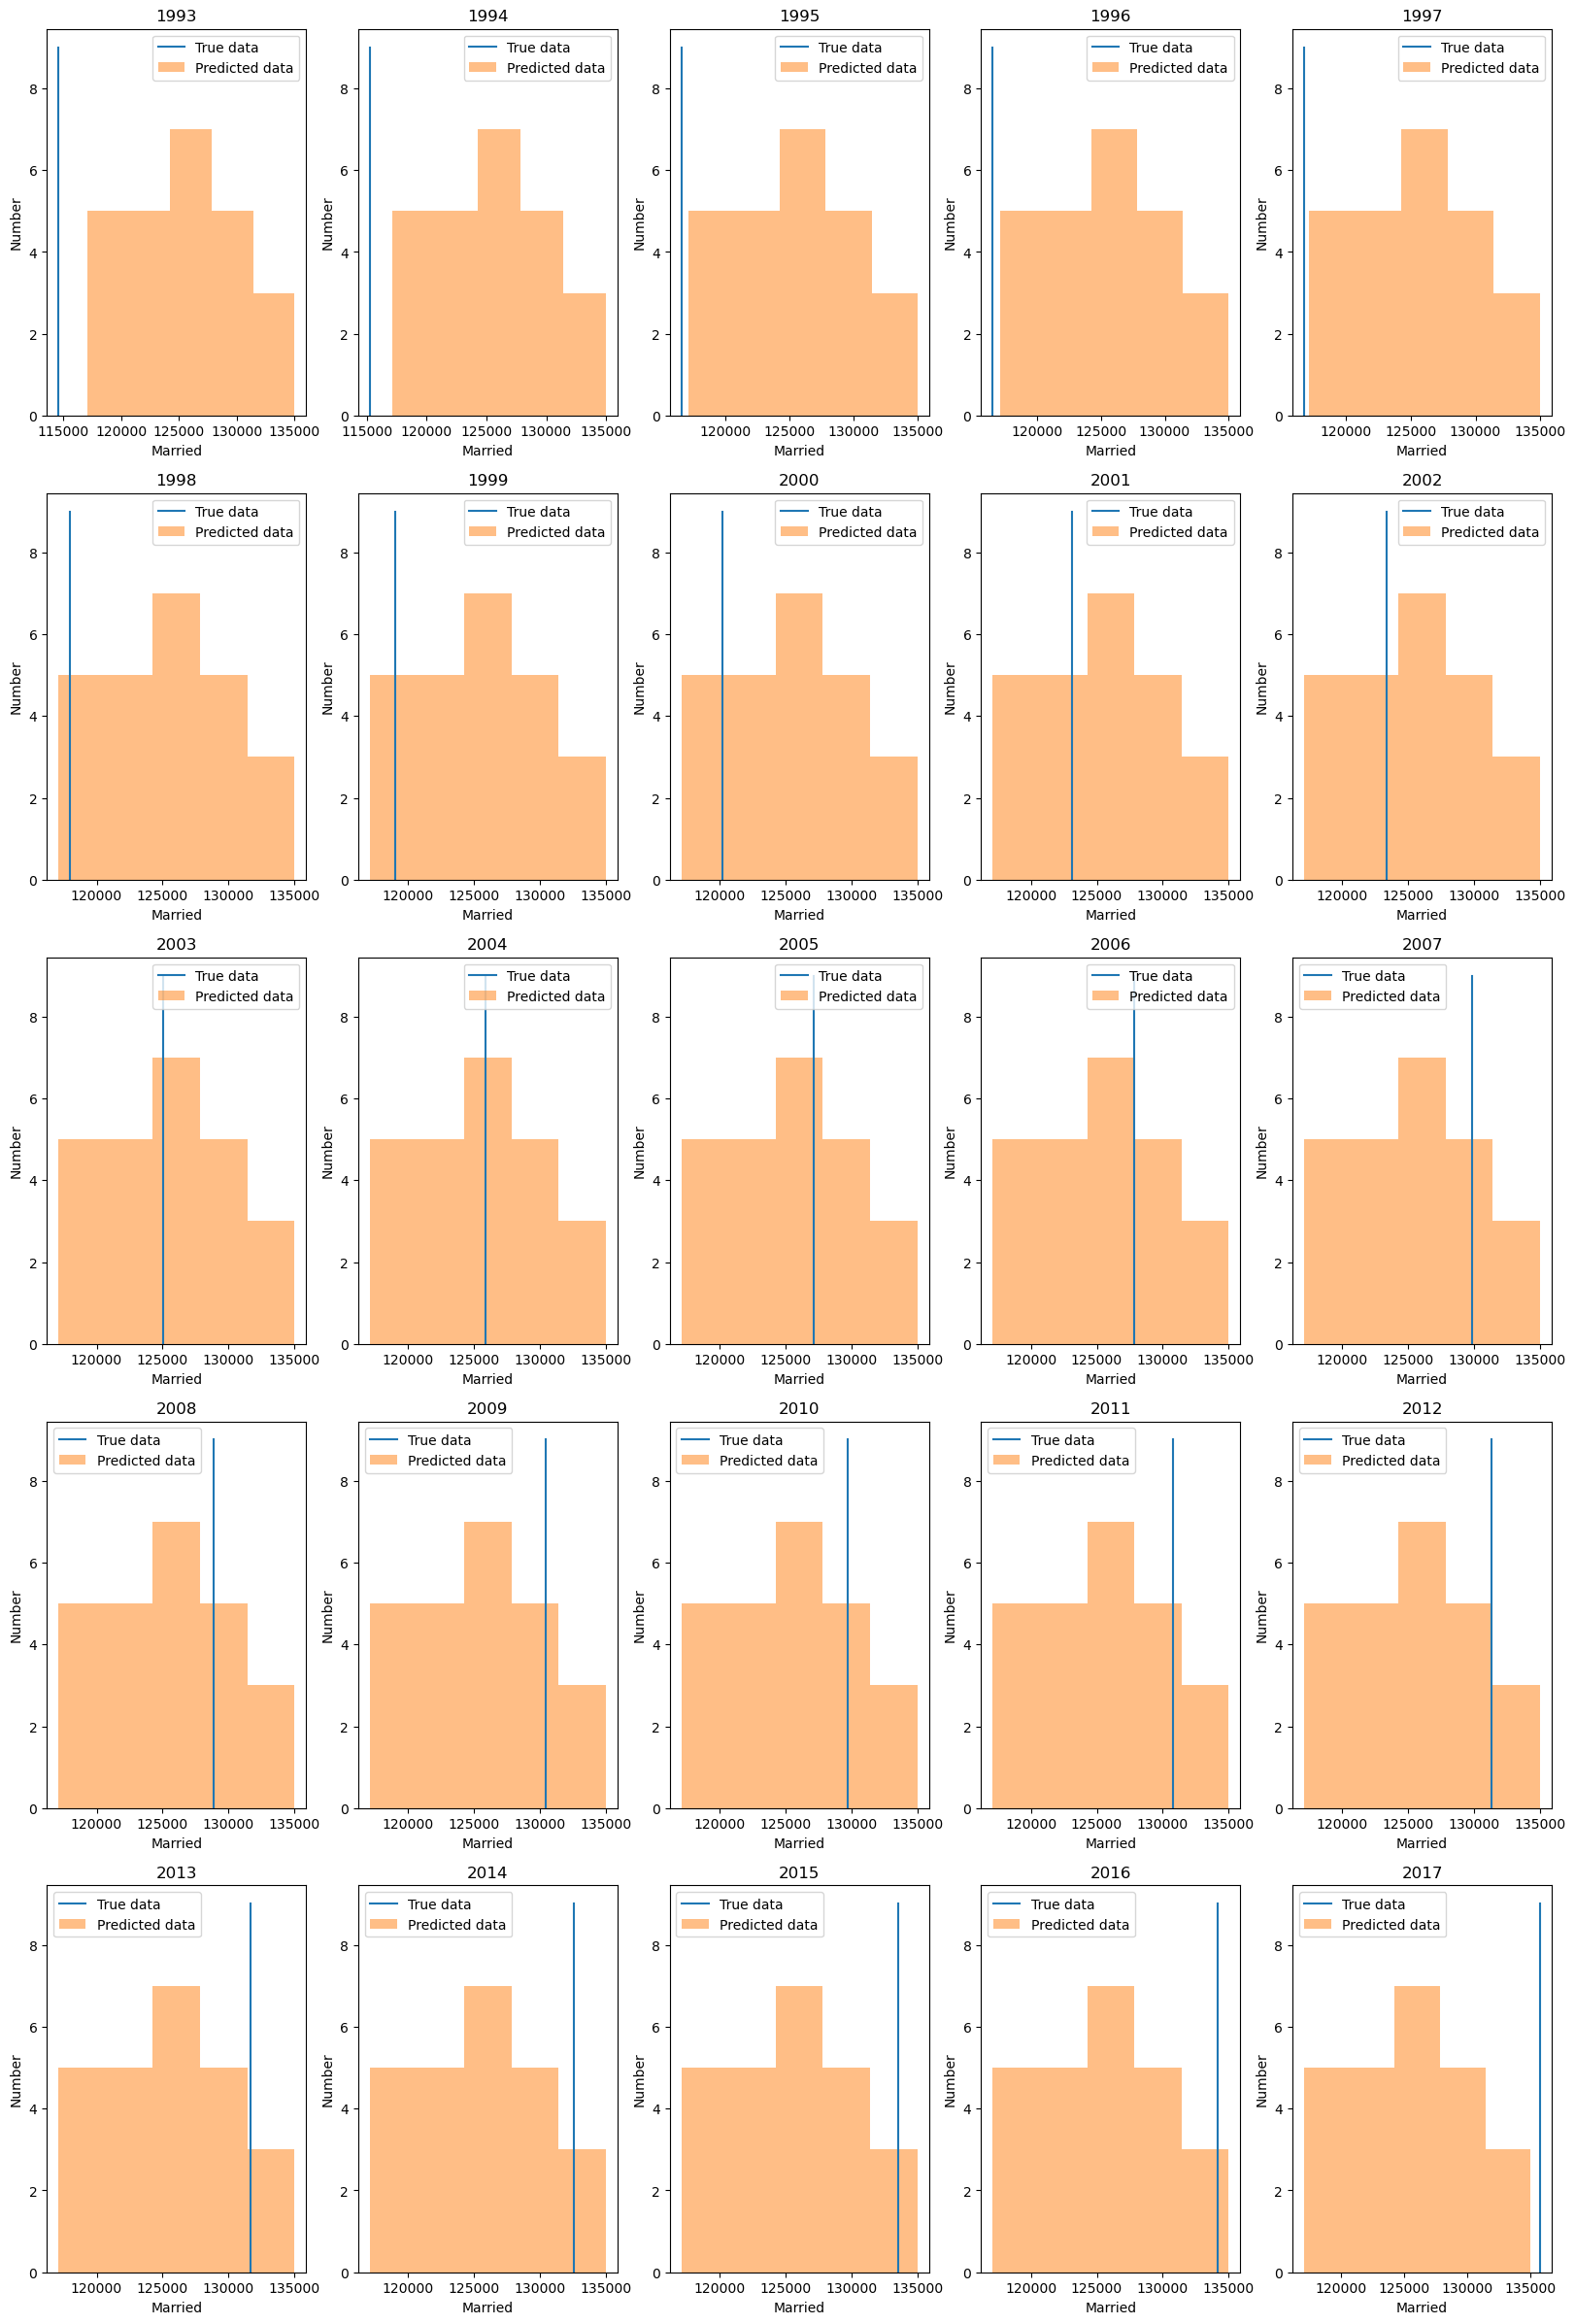

In [938]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_1.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

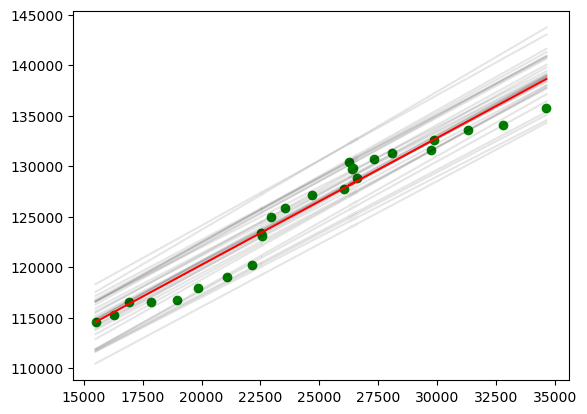

In [939]:
for i in range(len(gen_1.y_sim)):
    plt.plot(df['Income per member'], gen_1.alpha[i]*df['Income per member'] + gen_1.beta[i], color='black', alpha = 0.1)
plt.plot(df['Income per member'], gen_1.alpha[i].mean()*df['Income per member'] + gen_1.beta.mean(), color='red')   
plt.scatter(df['Income per member'], df['Married'], color='green')
plt.show()

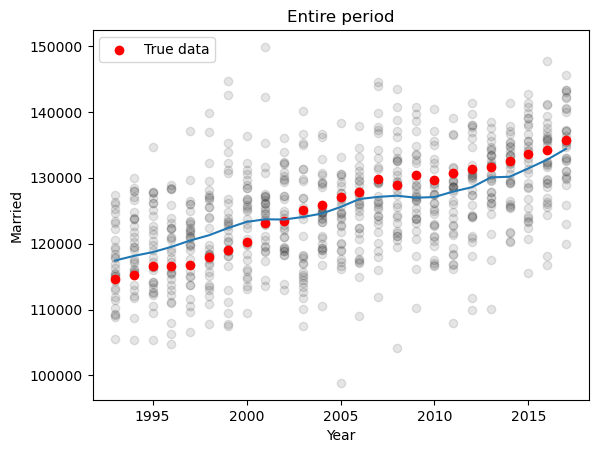

In [940]:
for i in range(len(fit_1.y_sim)):
    plt.scatter(df['Year'], fit_1.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], fit_1.alpha.mean()*df['Income per member'] + fit_1.beta.mean())
plt.title('Entire period')
plt.ylabel('Married')
plt.xlabel('Year')
plt.legend()
plt.show()

# Income i Household na ilość małżeństw

In [941]:
# from numpy import random
# alpha = 0.8
# beta = 108000

# sim = random.normal(alpha*df['Income'] + beta, 1500, 23)


# plt.plot(df['Income'], alpha*df['Income'] + beta, color='black')

# plt.plot(df['Income'], df['Married'],'.')
# plt.title('Lambda possible model values')
# plt.xlabel('Income')
# plt.ylabel('Married')
# plt.legend()
# plt.show()

In [942]:
model = CmdStanModel(stan_file='test_prior.stan')
data = {'N': N, 'income': df['Income']}
gen_2 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

15:12:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


15:12:37 - cmdstanpy - INFO - CmdStan done processing.


In [943]:
gen_2.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23],y_sim[24],y_sim[25]
0,0.0,0.0,1.26949,96401.3,859.623,194850.0,196898.0,199967.0,202432.0,204507.0,...,211421.0,212917.0,208553.0,208723.0,207761.0,213776.0,212321.0,217540.0,222582.0,226647.0
1,0.0,0.0,1.26697,96680.0,2223.110,193134.0,197838.0,198689.0,203832.0,205394.0,...,209741.0,209148.0,208856.0,207650.0,211508.0,216684.0,211091.0,216402.0,222476.0,223375.0
2,0.0,0.0,1.25590,97232.2,1379.080,197517.0,198733.0,197135.0,201540.0,204305.0,...,210763.0,212003.0,207372.0,206482.0,207740.0,212018.0,212496.0,217048.0,223041.0,226951.0
3,0.0,0.0,1.27199,94323.6,1124.730,194715.0,194373.0,197235.0,198537.0,203259.0,...,208710.0,210347.0,206753.0,206559.0,206068.0,212235.0,208897.0,216060.0,221776.0,225754.0
4,0.0,0.0,1.30557,95147.2,865.523,196246.0,197610.0,201912.0,202340.0,208241.0,...,213914.0,214462.0,210143.0,209724.0,211478.0,214978.0,214060.0,221429.0,224547.0,228256.0
5,0.0,0.0,1.25751,94824.9,926.679,194160.0,194897.0,196030.0,199381.0,201608.0,...,207313.0,207639.0,206180.0,205640.0,206687.0,210470.0,209520.0,215847.0,220296.0,224357.0
6,0.0,0.0,1.31147,95101.9,1684.080,197794.0,199232.0,205083.0,207606.0,206201.0,...,214974.0,212774.0,210097.0,213946.0,211181.0,214611.0,217413.0,221447.0,227116.0,234088.0
7,0.0,0.0,1.26611,93705.9,464.917,191842.0,194284.0,196620.0,198085.0,202239.0,...,207094.0,206918.0,204219.0,205978.0,205287.0,209477.0,209936.0,215184.0,220645.0,224635.0
8,0.0,0.0,1.24656,92550.8,524.128,189761.0,192003.0,193542.0,195246.0,198863.0,...,203840.0,205230.0,202316.0,202243.0,203405.0,207792.0,205872.0,211350.0,216189.0,221077.0
9,0.0,0.0,1.25660,95155.4,2021.170,197331.0,191324.0,196529.0,198190.0,202603.0,...,209645.0,207663.0,206042.0,205677.0,204399.0,211514.0,211653.0,214078.0,219800.0,226916.0


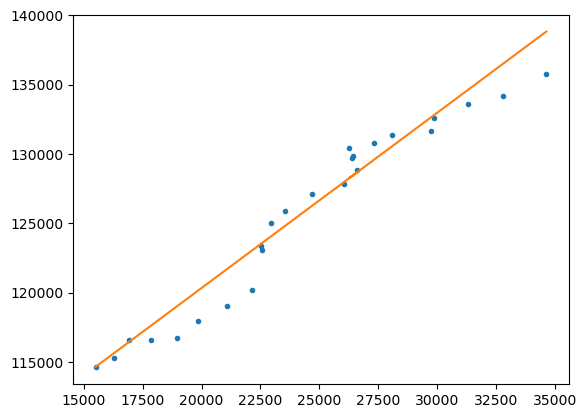

In [944]:
alpha = np.mean(gen_2.alpha)
beta = np.mean(gen_2.beta)
plt.plot(df['Income per member'], df['Married'],'.')
plt.plot(df['Income per member'], alpha*df['Income per member'] + beta) 
plt.show()

In [945]:
post_model = CmdStanModel(stan_file='test_posterior.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income per member']}
fit_2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

15:12:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


15:12:38 - cmdstanpy - INFO - CmdStan done processing.


In [946]:
# fit_2.draws_pd()

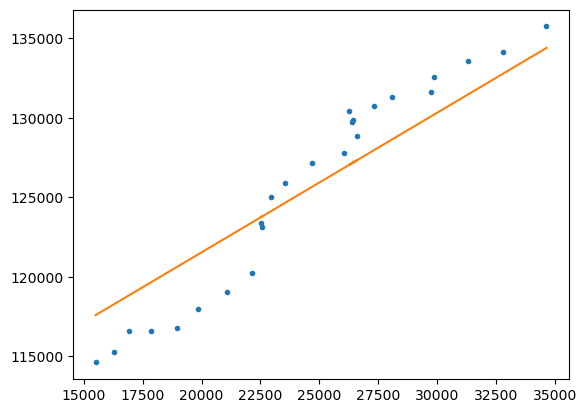

In [947]:
alpha = np.mean(fit_2.alpha)
beta = np.mean(fit_2.beta)
plt.plot(df['Income per member'], df['Married'],'.')
plt.plot(df['Income per member'], alpha*df['Income per member'] + beta) 
plt.show()

In [948]:
# n=1
# plt.figure(figsize=(20,30))
# for i in range(len(df)):
#     plt.subplot(5,5,n)
#     plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
#     plt.hist(fit_2.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
#     plt.title(df['Year'][i])
#     plt.ylabel('Number')
#     plt.xlabel('Married')
#     plt.legend()
#     n+=1

# plt.show()

# Trimodel

In [949]:
model = CmdStanModel(stan_file='tri_prior_test.stan')
data = {'N': N, 'income': df['Income per member'], 'household': df['Household'], 'mean_age': df['Mean age']}
gen_tri = model.sample(
                    data=data,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True)

15:12:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


15:12:39 - cmdstanpy - INFO - CmdStan done processing.


In [950]:
gen_tri.draws_pd()

,lp__,accept_stat__,alpha_1,alpha_2,alpha_3,beta,sigma,y_sim[1],y_sim[2],y_sim[3],...,y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23],y_sim[24],y_sim[25]
0,0.0,0.0,0.016090,0.821335,1279.61,65732.2,17.90680,112035.0,112452.0,113893.0,...,127003.0,126987.0,127110.0,128745.0,129384.0,130258.0,130464.0,131558.0,132165.0,132459.0
1,0.0,0.0,0.015849,0.802236,1280.71,70833.6,49.39150,115250.0,115792.0,116978.0,...,129851.0,129846.0,129912.0,131456.0,132227.0,133029.0,133254.0,134263.0,134883.0,135069.0
2,0.0,0.0,0.016798,0.806708,1279.94,65639.8,46.03000,110412.0,110935.0,112314.0,...,125098.0,125106.0,125276.0,126858.0,127493.0,128309.0,128600.0,129668.0,130245.0,130465.0
3,0.0,0.0,0.016200,0.817211,1279.45,65417.3,67.25740,111225.0,111740.0,113112.0,...,126138.0,126215.0,126355.0,127838.0,128600.0,129498.0,129627.0,130699.0,131254.0,131678.0
4,0.0,0.0,0.018219,0.817698,1281.28,67949.6,30.93680,113824.0,114251.0,115628.0,...,128689.0,128660.0,128802.0,130387.0,131055.0,131915.0,132059.0,133227.0,133755.0,134060.0
5,0.0,0.0,0.018486,0.819240,1279.65,71296.5,24.27690,117370.0,117745.0,119242.0,...,132248.0,132233.0,132377.0,133974.0,134670.0,135468.0,135718.0,136758.0,137334.0,137693.0
6,0.0,0.0,0.016707,0.813296,1280.50,65244.3,116.26500,110583.0,111246.0,112515.0,...,125659.0,125518.0,125626.0,127307.0,127795.0,128682.0,128889.0,130153.0,130672.0,130908.0
7,0.0,0.0,0.018126,0.819587,1282.29,66067.2,133.25400,112105.0,112529.0,114308.0,...,126984.0,127156.0,127023.0,129023.0,129557.0,130189.0,130260.0,131424.0,132259.0,132327.0
8,0.0,0.0,0.016379,0.832012,1279.79,70414.0,89.82410,117716.0,118238.0,119509.0,...,132909.0,132798.0,133085.0,134696.0,135192.0,136180.0,136356.0,137538.0,138202.0,138422.0
9,0.0,0.0,0.018237,0.821477,1279.34,66513.1,121.60600,112608.0,113216.0,114587.0,...,127856.0,127944.0,127733.0,129398.0,130212.0,131070.0,131209.0,132285.0,132711.0,133236.0


In [951]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = df['Income']
y = df['Household']
z = df['Married']
c = df['Mean age']

X = np.column_stack((np.ones_like(x), x, y, c))  # Add a column of ones for the intercept
coefficients = np.linalg.lstsq(X, z, rcond=None)[0]

# Extract coefficients
intercept, slope_x, slope_y, slope_c = coefficients

# Define points for the plane
z_plane = intercept + slope_x * x + slope_y * y + slope_c * c


In [952]:
intercept, slope_x, slope_y, slope_c

(68759.89664843632,
 -0.0174222826811109,
 0.8248980294898896,
 -1280.860068126664)

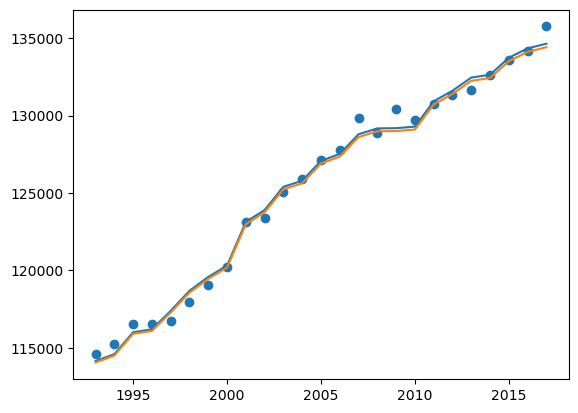

In [953]:

plt.scatter(df["Year"], df['Married'])
plt.plot(df["Year"], slope_x*df['Income per member'] + slope_y*df['Household'] + slope_c*df['Mean age'] + intercept-1200)
plt.plot(df["Year"], -gen_tri.alpha_1.mean()*df['Income per member'] + gen_tri.alpha_2.mean()*df['Household'] - gen_tri.alpha_3.mean()*df['Mean age'] + gen_tri.beta.mean())

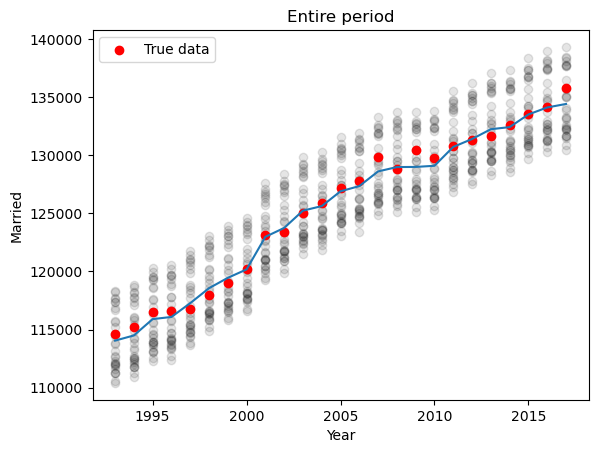

In [954]:
for i in range(len(fit_1.y_sim)):
    plt.scatter(df['Year'], gen_tri.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], -gen_tri.alpha_1.mean()*df['Income per member'] + gen_tri.alpha_2.mean()*df['Household'] - gen_tri.alpha_3.mean()*df['Mean age']+ gen_tri.beta.mean())
plt.title('Entire period')
plt.ylabel('Married')
plt.xlabel('Year')
plt.legend()
plt.show()

In [955]:
post_model = CmdStanModel(stan_file='tri_posterior_test.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income per member'], 'household': df['Household'], 'mean_age': df['Mean age']}
fit_tri = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

15:12:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                     


15:12:42 - cmdstanpy - INFO - CmdStan done processing.


In [956]:
# fit_tri.draws_pd()

In [957]:
fit_tri.alpha_1.mean()

0.018368146666666665

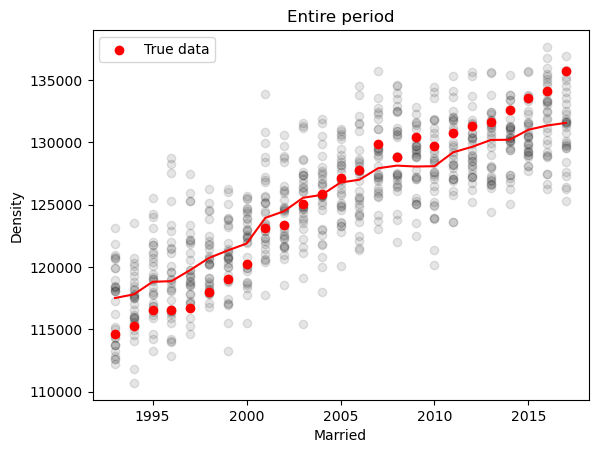

In [958]:
for i in range(len(fit_tri.y_sim)):
    plt.scatter(df['Year'], fit_tri.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], -fit_tri.alpha_1.mean()*df['Income per member'] + fit_tri.alpha_2.mean()*df['Household'] - fit_tri.alpha_3.mean()*df['Mean age'] + fit_tri.beta.mean(), color='red')   
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

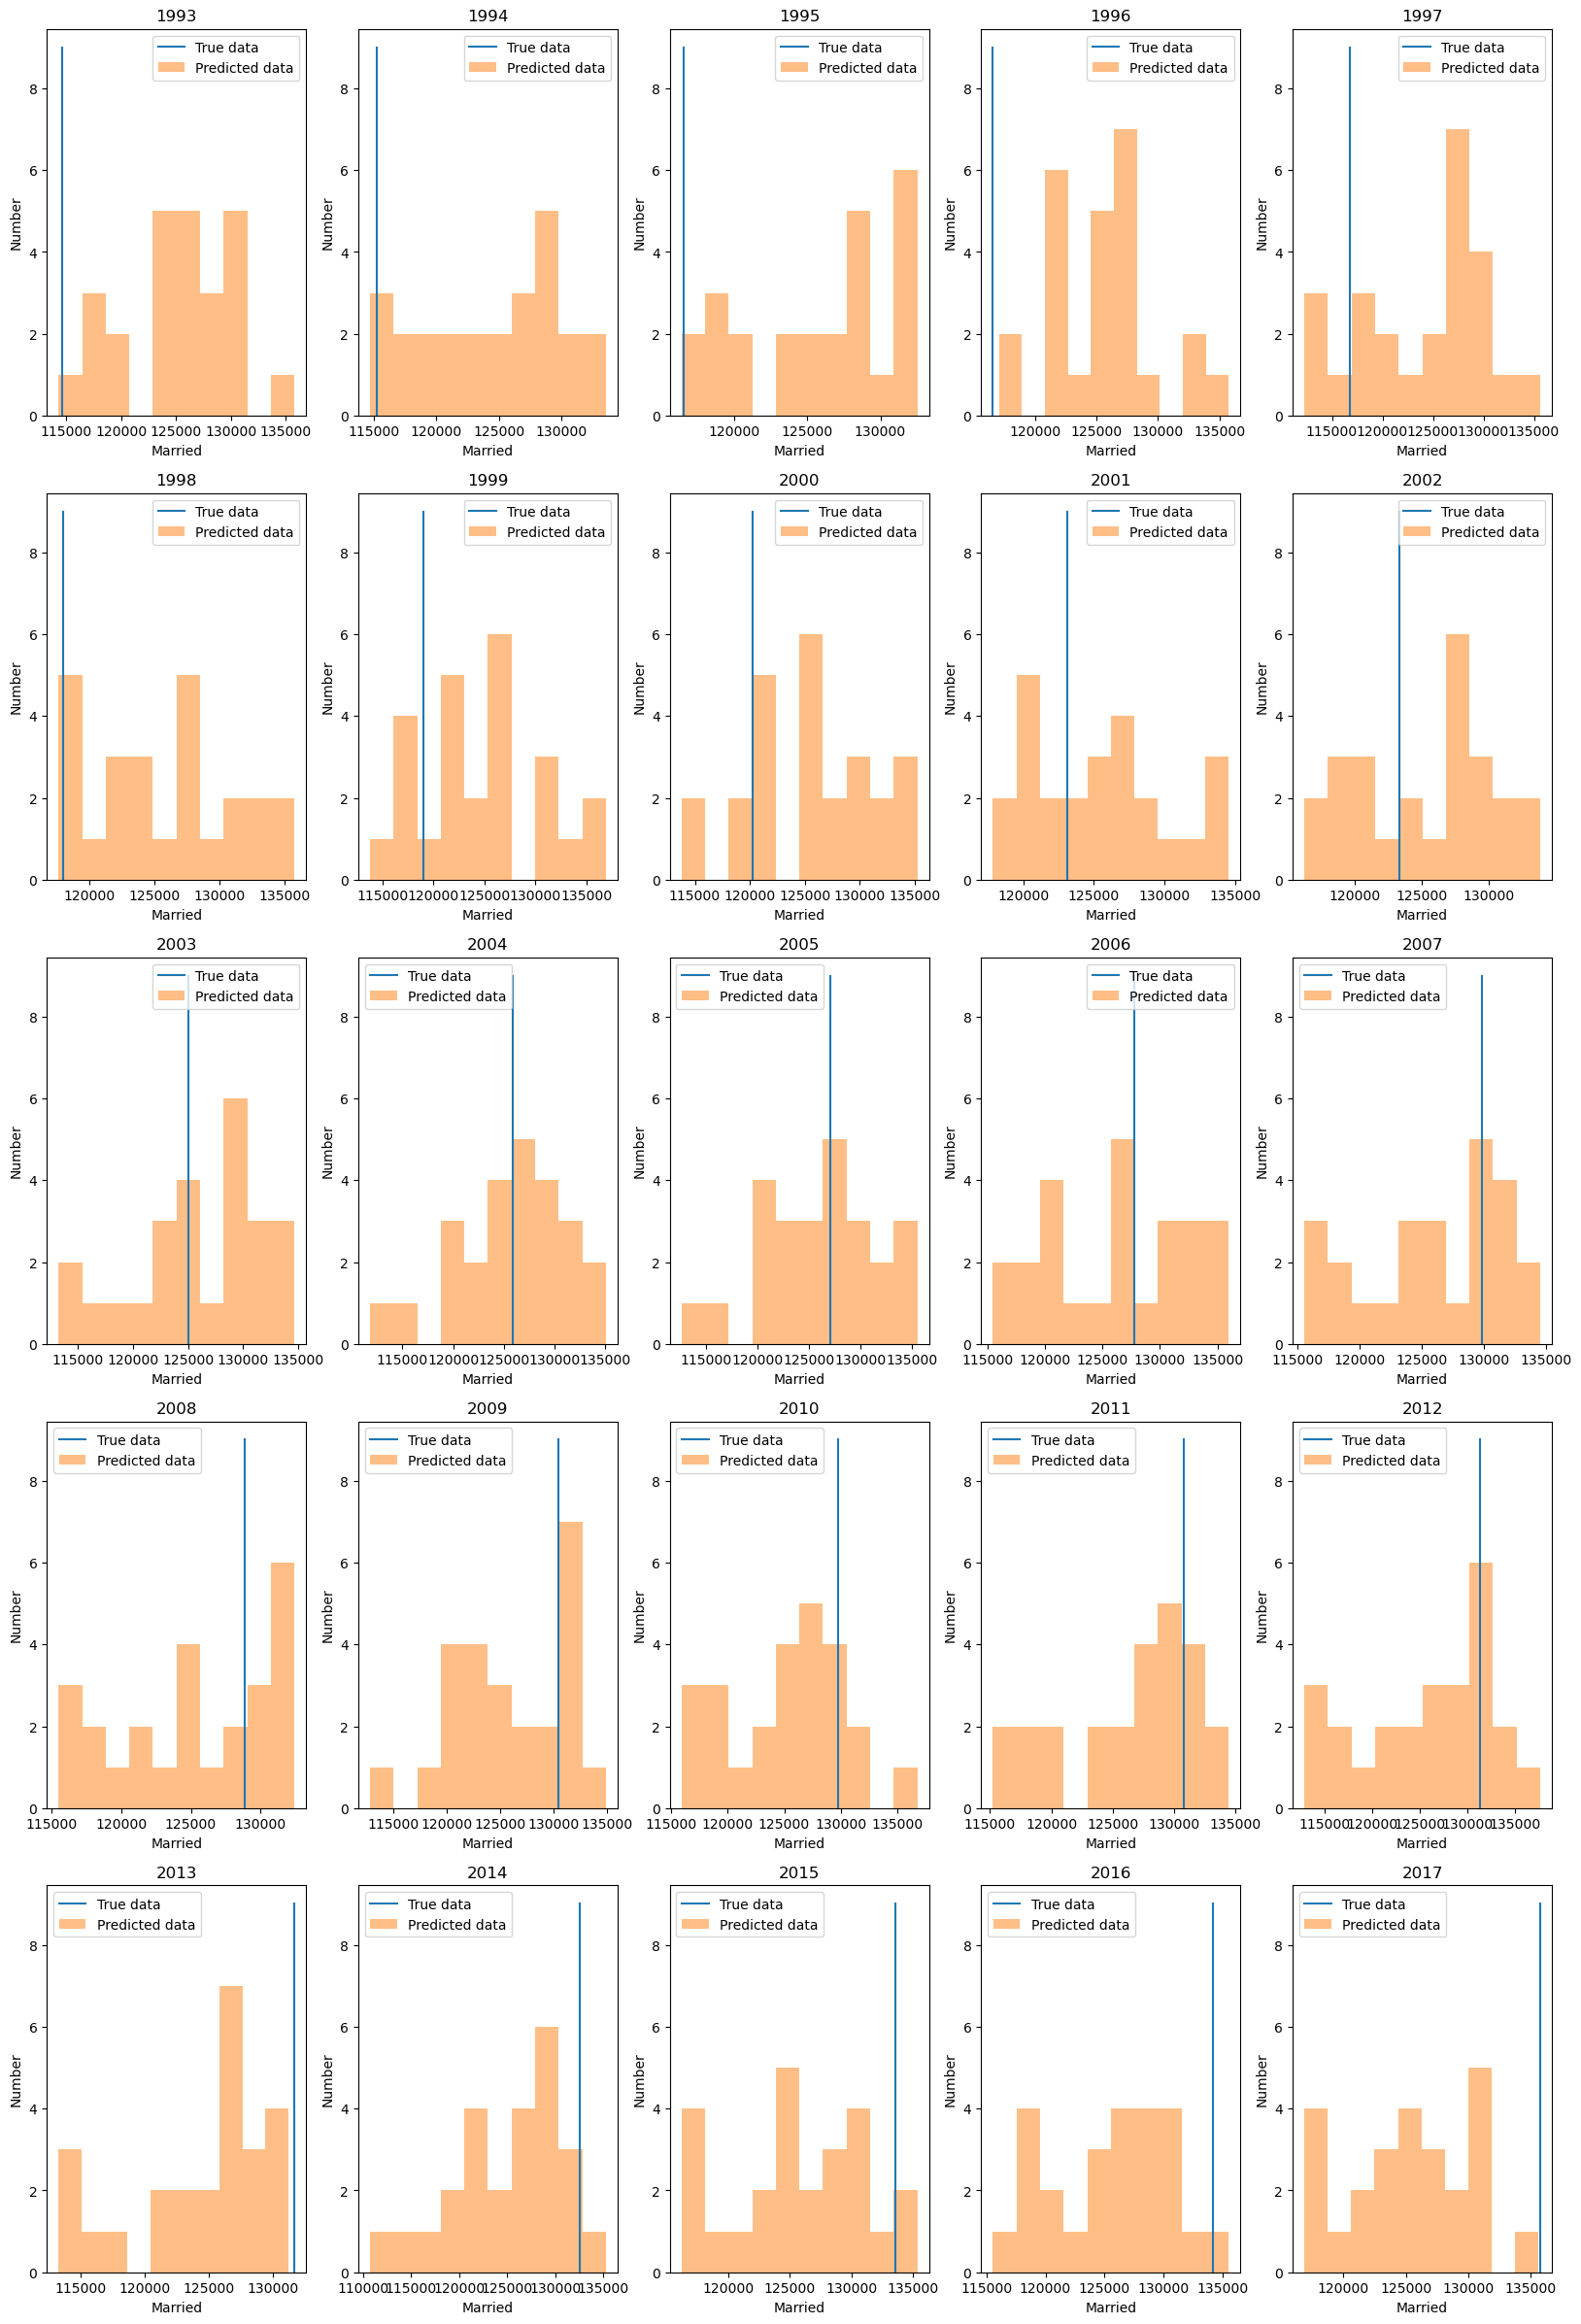

In [959]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_tri.y_sim[i], bins=10, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

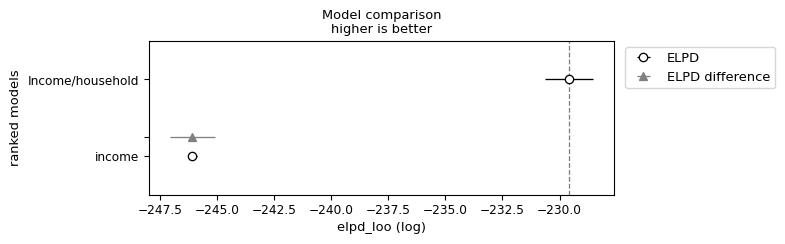

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Income/household,0,-229.583932,0.035041,0.000000,1.0,1.034093,0.000000,False,log
income,1,-246.076369,0.018782,16.492437,0.0,0.198668,0.985643,True,log


In [960]:
# Compare the models using LOO
loo_compare = az.compare({"income": fit_1, "Income/household": fit_tri}, ic="loo")

az.plot_compare(loo_compare)
plt.show()
loo_compare

In [966]:
post_model = CmdStanModel(stan_file='test_posterior.stan')
data_post = {'N': 30, 'y': df_all['Married'], 'income': df_all['Income per member']}
fit_t1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)


post_model = CmdStanModel(stan_file='tri_posterior_test.stan')
data_post = {'N': 30, 'y': df_all['Married'], 'income': df_all['Income per member'], 'household': df_all['Household'], 'mean_age': df_all['Mean age']}
fit_t2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)


15:15:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


15:15:41 - cmdstanpy - INFO - CmdStan done processing.


15:15:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                     


15:15:45 - cmdstanpy - INFO - CmdStan done processing.


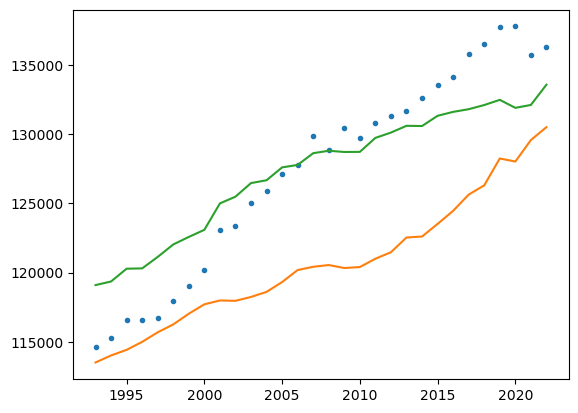

In [967]:
alpha1 = np.mean(fit_t1.alpha)
beta = np.mean(fit_1.beta)
plt.plot(df_all['Year'], df_all['Married'],'.')
plt.plot(df_all['Year'], alpha1*df_all['Income per member'] + beta) 

alpha1 = np.mean(fit_t2.alpha_1)
alpha2 = np.mean(fit_t2.alpha_2)
alpha3 = np.mean(fit_t2.alpha_3)
beta = np.mean(fit_t2.beta)
plt.plot(df_all['Year'], -alpha1*df_all['Income per member'] + alpha2*df_all['Household'] - alpha3*df_all['Mean age'] + beta) 

plt.show()

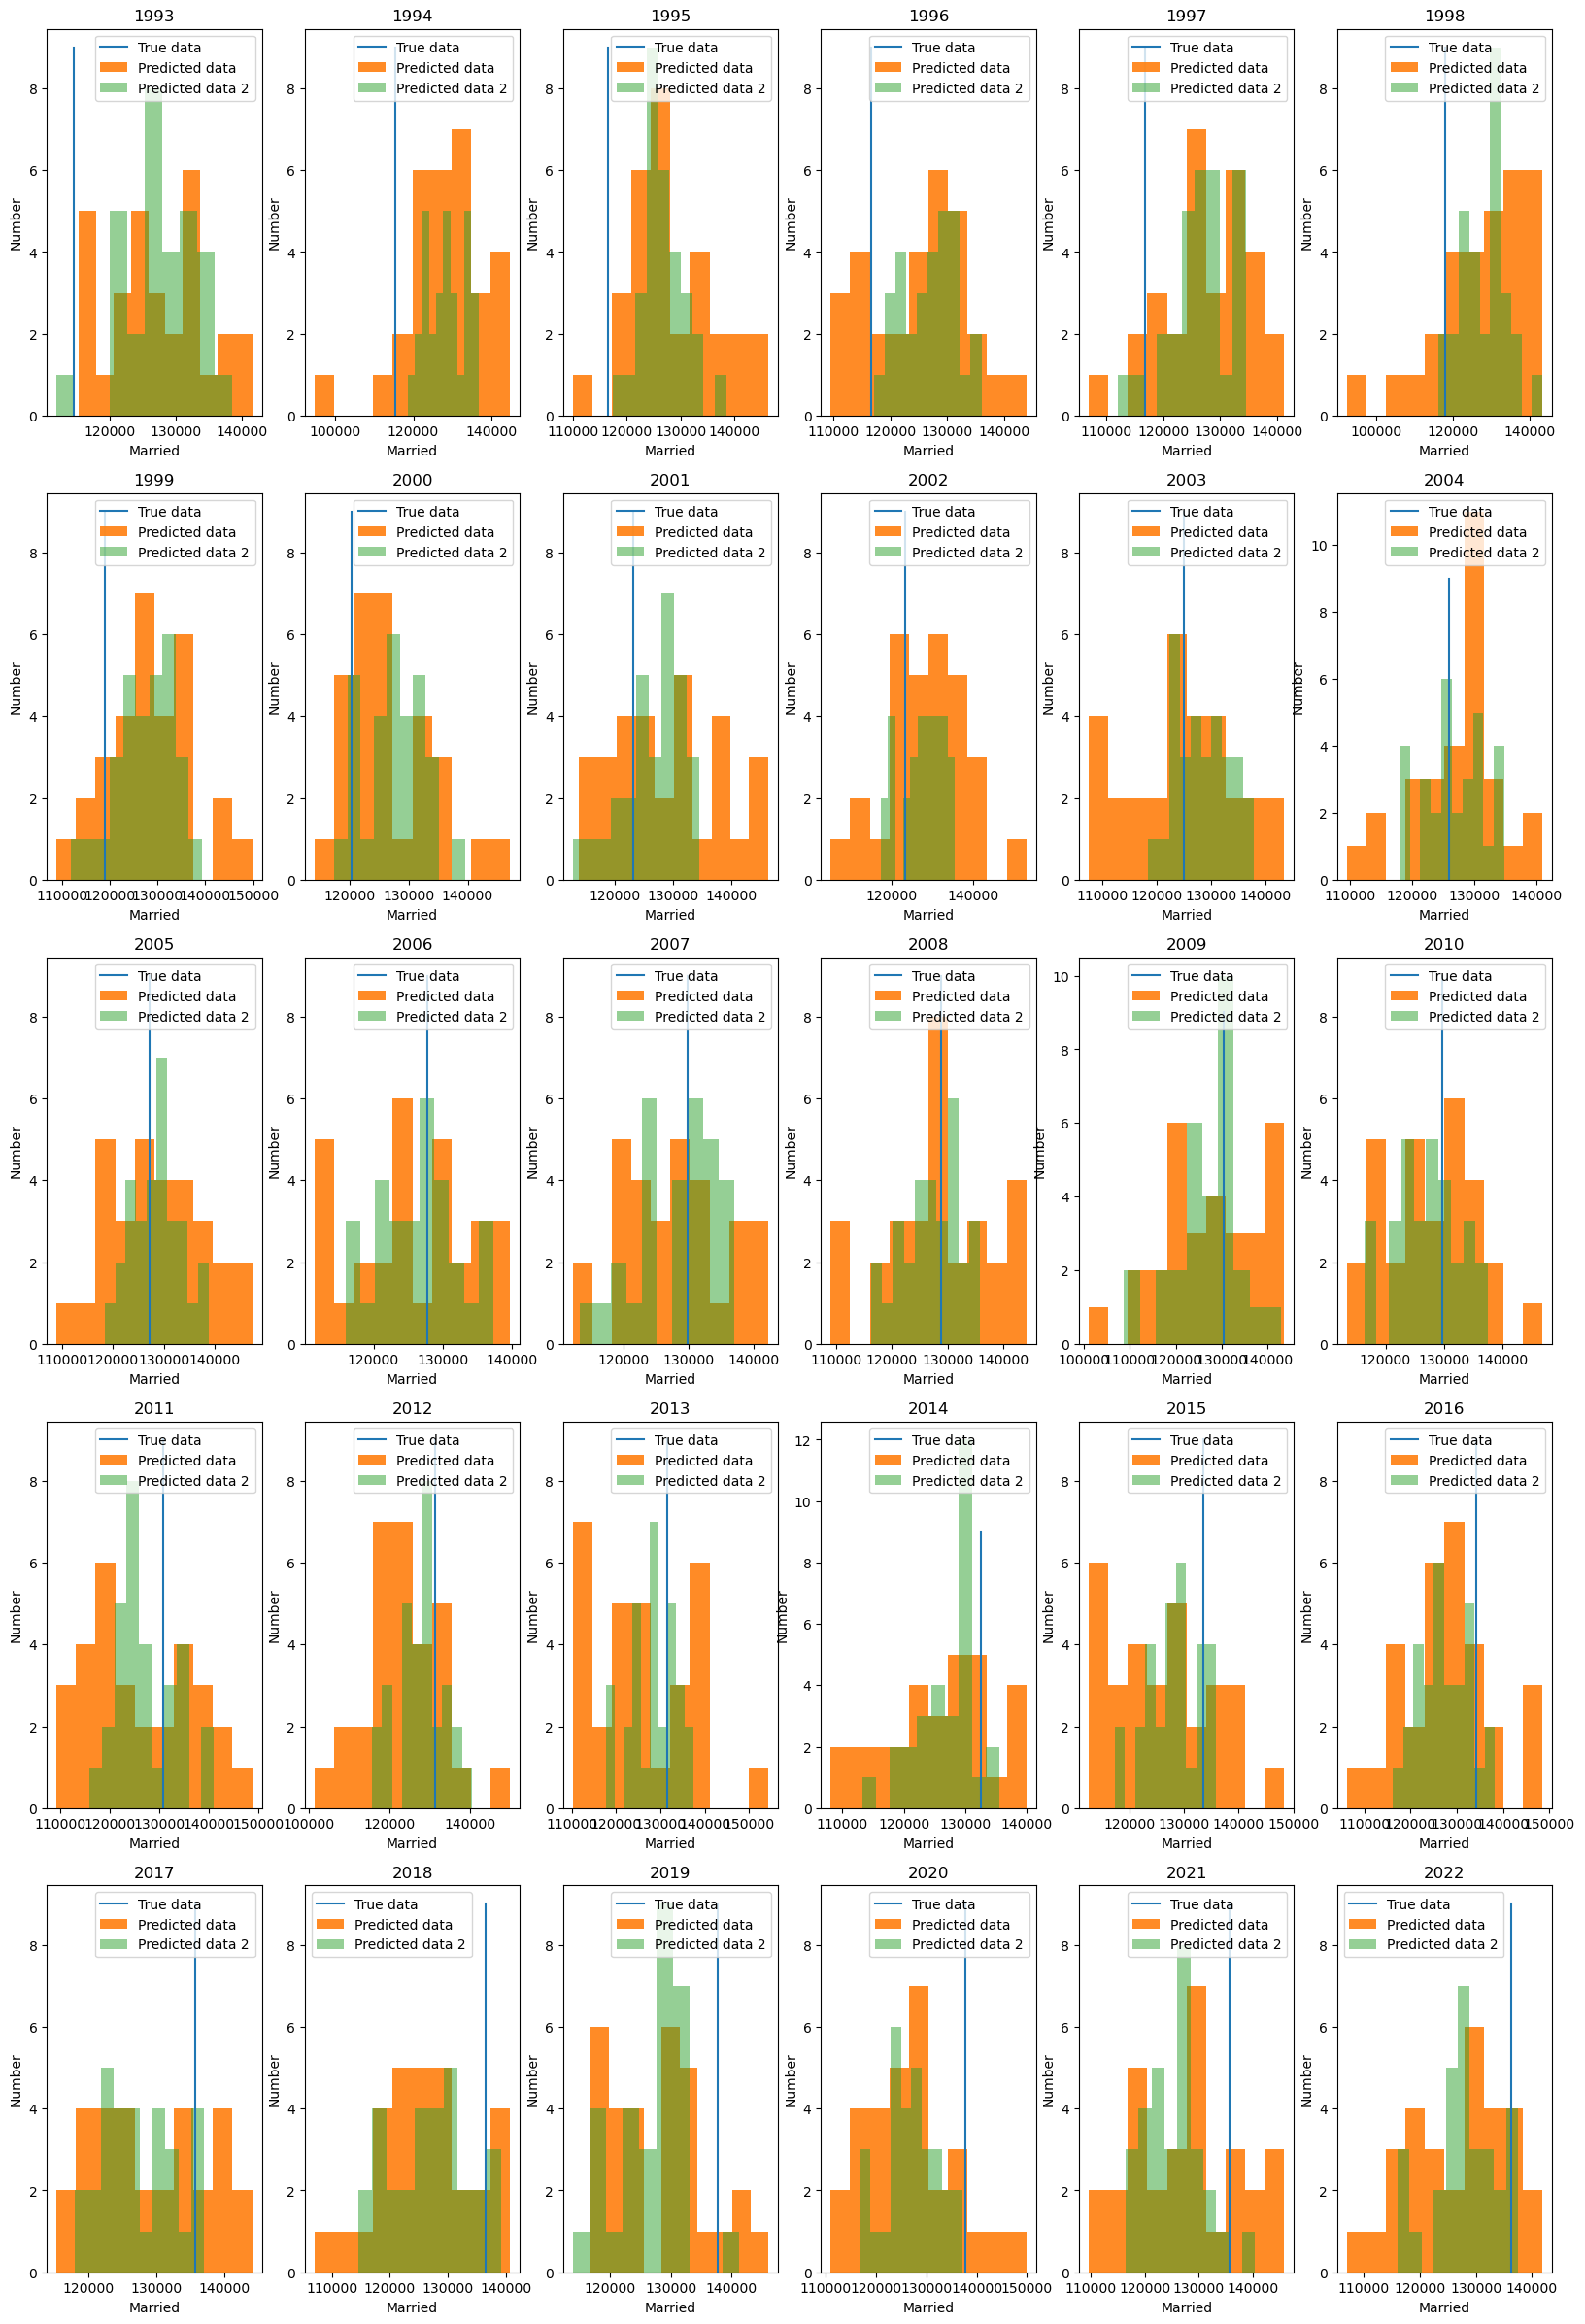

In [964]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df_all)):
    plt.subplot(5,6,n)
    plt.plot([df_all['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_t1.y_sim[:][i], bins=10, alpha = 0.9, label = 'Predicted data')
    plt.hist(fit_t2.y_sim[:][i], bins=10, alpha = 0.5, label = 'Predicted data 2')
    plt.title(df_all['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

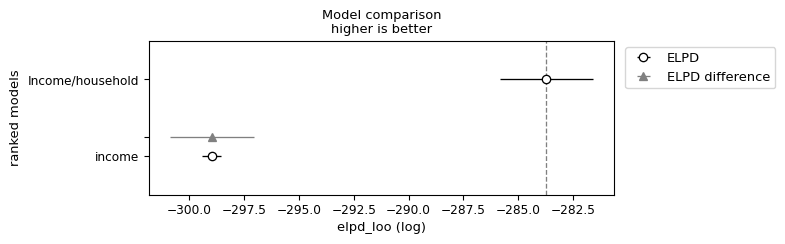

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Income/household,0,-283.713543,0.055971,0.000000,1.000000e+00,2.112519,0.000000,True,log
income,1,-298.974911,0.016307,15.261368,2.540190e-13,0.425253,1.911846,False,log


In [963]:
# Compare the models using LOO
loo_compare = az.compare({"income": fit_t1, "Income/household": fit_t2}, ic="loo")

az.plot_compare(loo_compare)
plt.show()
loo_compare